In [1]:
# importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
# checking the data
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# checking inforamtion about variables 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# description about numberical variables 
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# droping the passengerId from dataset 
df.drop('PassengerId', axis=1, inplace=True)

In [7]:
# checking missing values present in the data set
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
# dealing with missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Cabin'].fillna(df['Cabin'].mode()[1], inplace=True)
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

## Since SibSp, Parch, Pclass variables are looking more like categorical variable so we will convert them into categorical variables.

In [10]:
df['SibSp'] = pd.Categorical(df['SibSp'])
df['Parch'] = pd.Categorical(df['Parch'])
df['Pclass'] = pd.Categorical(df['Pclass'])

In [11]:
## checking information again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
Survived    889 non-null int64
Pclass      889 non-null category
Name        889 non-null object
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null category
Parch       889 non-null category
Ticket      889 non-null object
Fare        889 non-null float64
Cabin       889 non-null object
Embarked    889 non-null object
dtypes: category(3), float64(2), int64(1), object(5)
memory usage: 65.9+ KB


In [12]:
df.dtypes.value_counts()

object      5
float64     2
int64       1
category    1
category    1
category    1
dtype: int64

# checking outliers if present in data

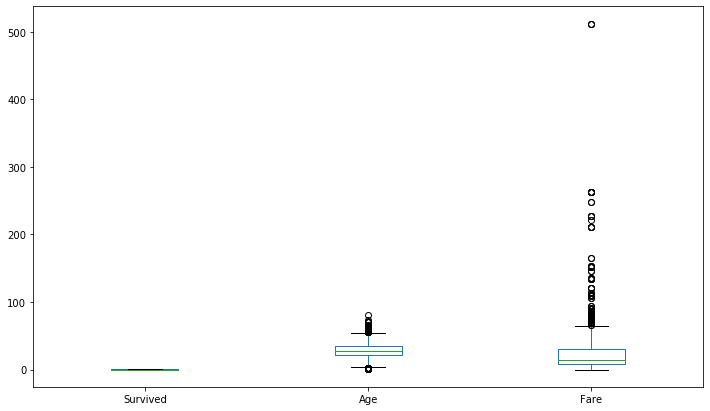

In [13]:
df.plot(kind='box', figsize=(12,7))

## Since, we haven't normalized our data set that is why every variable affected by the units.
## We can clearly see that outliers are present in Age, SibSp, Parch and Fare variables.

In [14]:
def calculate_upper_and_lower_values(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    ll = Q1 - 1.5*IQR
    up = Q3 + 1.5*IQR
    return ll, up

In [15]:
columns = ['Age', 'Fare']
for i in columns:
    ll, up = calculate_upper_and_lower_values(df[i])
    df[i] = np.where(df[i] > up, up, df[i])
    df[i] = np.where(df[i] < ll, ll, df[i])

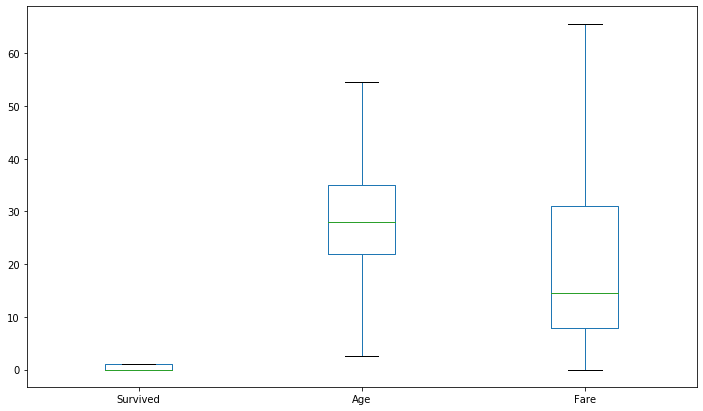

In [16]:
df.plot(kind='box', figsize=(12,7))

## We have successfully remove outliers from our dataset